# 1. Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./src/spam.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# 2. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [8]:
df.columns = ["target","message"]

In [9]:
df.sample(4)

,target,message
4264,ham,&lt;DECIMAL&gt; m but its not a common car he...
1027,ham,Are you not around or just still asleep? :V
2152,ham,Hi kindly give us back our documents which we ...
5493,ham,I think if he rule tamilnadu..then its very to...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [11]:
df.sample(4)

,target,message
920,0,When u wana see it then
175,0,Let me know when you've got the money so carlo...
3110,0,Short But Cute : \ Be a good person
4877,1,No 1 POLYPHONIC tone 4 ur mob every week! Just...


In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df = df.drop_duplicates(keep = "first")

In [14]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 3. Data Analysis

In [15]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

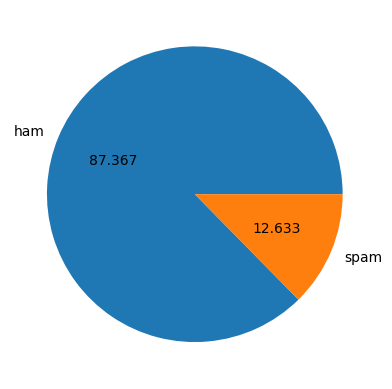

In [16]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%.3f")
plt.show()

In [35]:
## !pip install nltk
import nltk
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
## extracting number of characters
df["characters"] = df["message"].apply(len)

In [22]:
## extracting number of words
df["words"] = df["message"].apply(lambda x : len(nltk.word_tokenize(x)))

In [23]:
df["sentences"] = df["message"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [24]:
df.sample(5)

,target,message,characters,words,sentences
3498,0,I hope you arnt pissed off but id would really...,95,19,2
5376,0,I don't want you to leave. But i'm barely doin...,116,28,3
392,0,Morning only i can ok.,22,6,1
4594,0,Yo sorry was in the shower sup,30,7,1
354,0,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.,45,16,2


In [25]:
# ham meassages
df[df["target"] == 0].describe()

,target,characters,words,sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [26]:
# spam messages
df[df["target"] == 1].describe()

,target,characters,words,sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

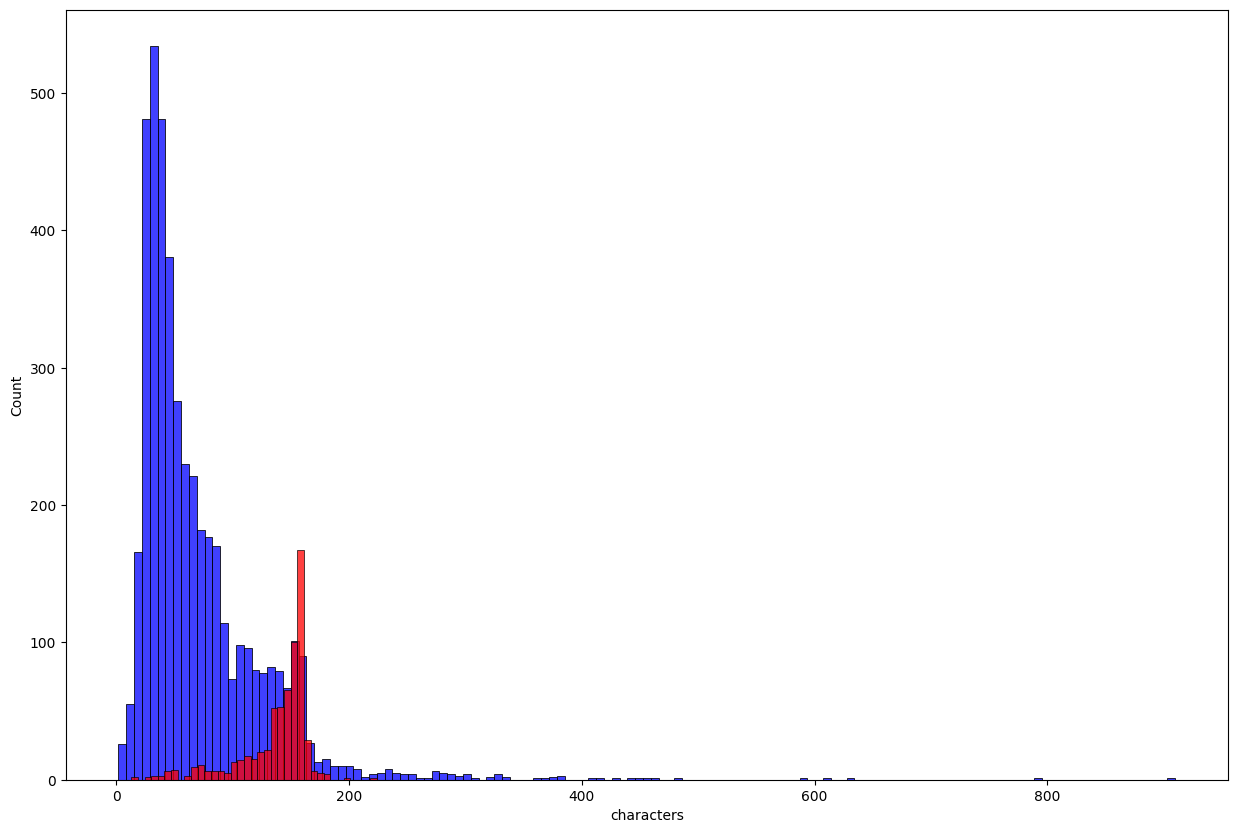

In [28]:
plt.figure(figsize=(15,10))
sns.histplot(df[df["target"] == 0]["characters"],color="blue")
sns.histplot(df[df["target"] == 1]["characters"],color="red")
plt.show()

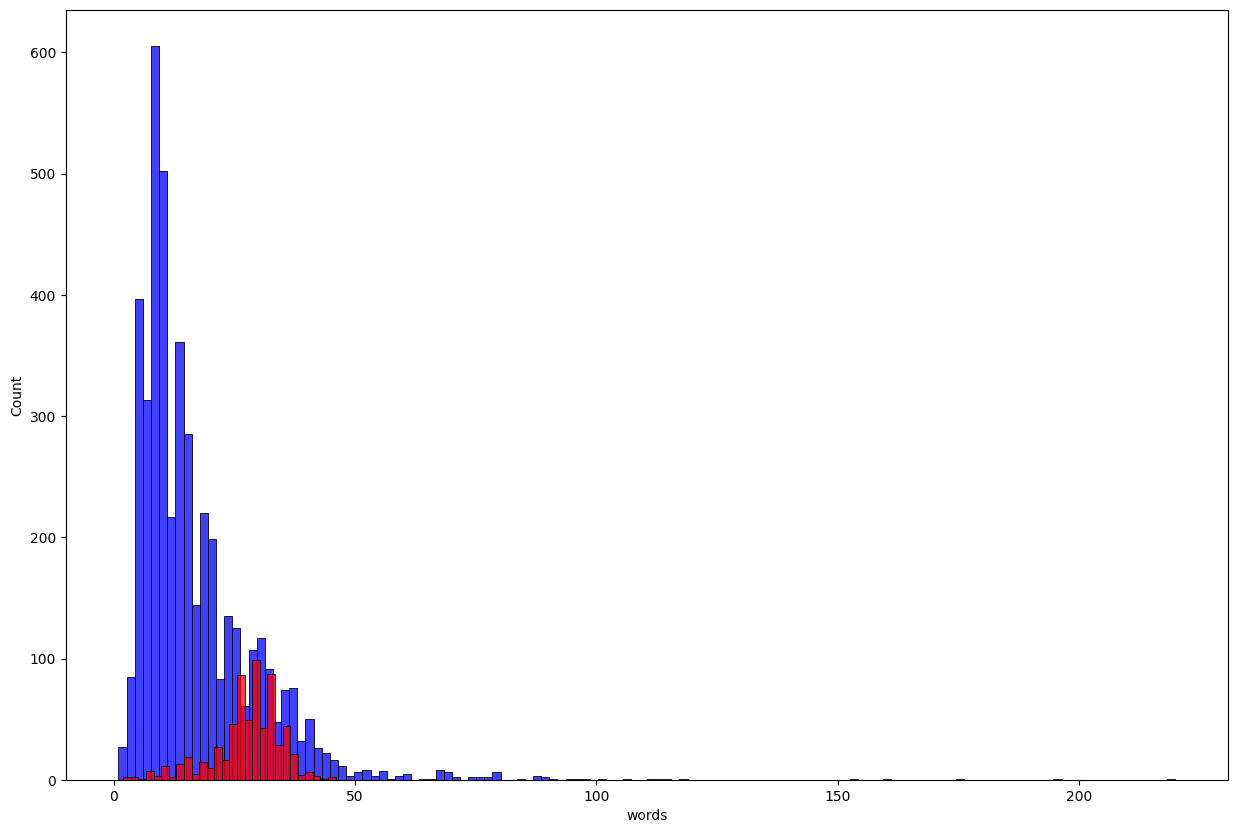

In [29]:
plt.figure(figsize=(15,10))
sns.histplot(df[df["target"] == 0]["words"],color="blue")
sns.histplot(df[df["target"] == 1]["words"],color="red")
plt.show()

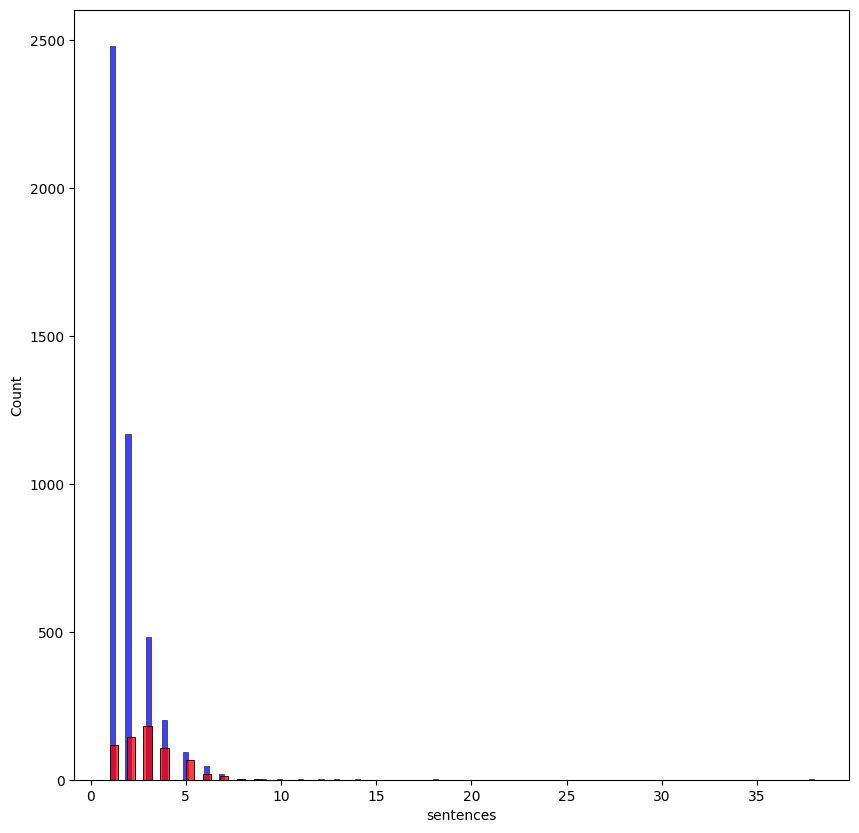

In [30]:
plt.figure(figsize=(10,10))
sns.histplot(df[df["target"] == 0]["sentences"],color="blue")
sns.histplot(df[df["target"] == 1]["sentences"],color="red")
plt.show()

<Figure size 1500x1000 with 0 Axes>

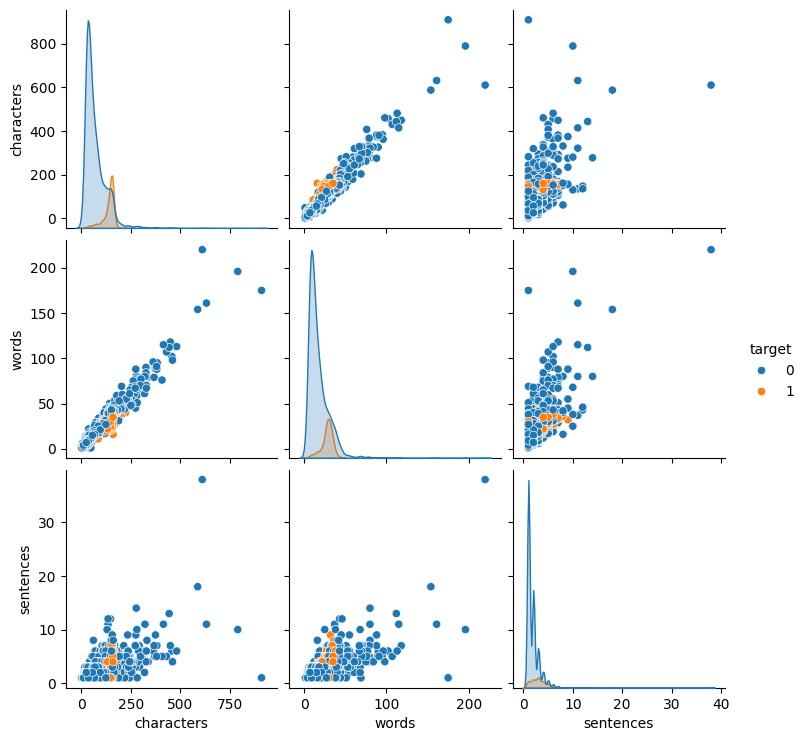

In [31]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="target")
plt.show()

# 4. Data preprocessing

In [32]:
df.sample(4)

,target,message,characters,words,sentences
1688,0,Nan sonathaya soladha. Why boss?,32,7,2
2241,0,U buy newspapers already?,25,5,1
4843,1,YOU HAVE WON! As a valued Vodafone customer ou...,136,28,4
4122,0,"Cool, want me to go to kappa or should I meet ...",60,15,1


In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

stemmer = PorterStemmer()

# function to apply text preprocessing
def text_transform(text):
    # convert to lower case
    text = text.lower()
    # tokenize the text to individual words
    text = nltk.word_tokenize(text)
    # remove special characters and convert
    lst = []
    for word in text:
        # stopwords : which helps in formation of sentences and has no special meaning
        if word.isalnum() and word not in stopwords.words("english") and word not in string.punctuation:
            lst.append(stemmer.stem(word))

    return " ".join(lst)


In [36]:
df["transformed text"] = df["message"].apply(lambda x : text_transform(x))

In [37]:
df.sample(5)

,target,message,characters,words,sentences,transformed text
2621,0,Lol! Nah wasn't too bad thanks. Its good to b ...,136,34,5,lol nah bad thank good b home quit realiti che...
81,0,K. Did you call me just now ah?,32,9,1,call ah
4710,0,Huh so slow i tot u reach long ago liao... U 2...,77,21,1,huh slow tot u reach long ago liao u 2 day 4 leh
2236,0,Pls tell nelson that the bb's are no longer co...,88,19,2,pl tell nelson bb longer comin money expect ai...
4224,0,\The world suffers a lot... Not because of the...,115,26,2,world suffer lot violenc bad peopl silenc good...


In [39]:
# representation using wordcloud
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,min_font_size=5,background_color="white")

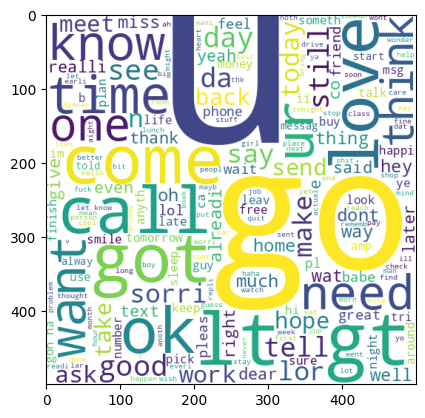

In [40]:
# wordcloud of ham
plt.imshow(wc.generate(df[df["target"] == 0]["transformed text"].str.cat(sep=" "))) 
plt.show()

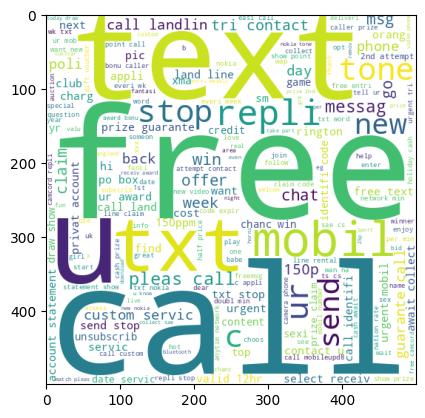

In [41]:
# wordcloud of spam
plt.imshow(wc.generate(df[df["target"] == 1]["transformed text"].str.cat(sep=" "))) 
plt.show()

In [42]:
def count_message(lst):
    word_list = []
    for msg in lst:
        for word in msg.split():
            word_list.append(word)
    return word_list

In [43]:
spam_lst = count_message(df[df["target"] == 1]["transformed text"].tolist())
ham_lst = count_message(df[df["target"] == 0]["transformed text"].tolist())

In [44]:
print("Total words in ham : ",len(ham_lst))
print("Total words in spam : ",len(spam_lst))

Total words in ham :  35404
Total words in spam :  9939


In [45]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_lst).most_common(10))
ham_df = pd.DataFrame(Counter(ham_lst).most_common(10))

In [46]:
spam_df.head(10)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [47]:
ham_df.head(10)

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# 5. Text conversion

###  Bag of words

In [48]:
## https://pages.github.rpi.edu/kuruzj/website_introml_rpi/notebooks/08-intro-nlp/03-scikit-learn-text.html

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [50]:
bag_of_words = vectorizer.fit_transform(df["transformed text"]).toarray()

In [51]:
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

### tf-idf encoding

In [52]:
## https://pages.github.rpi.edu/kuruzj/website_introml_rpi/notebooks/08-intro-nlp/03-scikit-learn-text.html

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [54]:
Tf_idf = vectorizer.fit_transform(df["transformed text"]).toarray()

In [55]:
Tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 6708))

### word2vec encoding

In [56]:
## https://youtu.be/hQwFeIupNP0
## https://youtu.be/hQwFeIupNP0
## https://www.hackersrealm.net/post/word2vec-python#:~:text=Word2Vec%20is%20a%20popular%20technique,can%20be%20used%20in%20python.

In [58]:
from gensim.models import Word2Vec
import gensim

In [59]:
model = Word2Vec(vector_size = 100 , min_count = 1 , window = 2 , workers= 2)

In [60]:
df["temp"] = df["transformed text"].apply(lambda x : x.split())

In [61]:
model.build_vocab(df["temp"])
model.train(df["temp"], total_examples=model.corpus_count, epochs=model.epochs)

(207107, 226715)

In [62]:
df = df.drop(["temp"],axis=1)

In [63]:
model.save("./src/word2vec.model")

# 6. Training models

## Classification training

In [64]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.svm import SVC
from sklearn.naive_bayes import  GaussianNB , MultinomialNB , BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier as ETC , RandomForestClassifier as RF

from sklearn.metrics import accuracy_score , precision_score , confusion_matrix
from sklearn.model_selection import train_test_split as tt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [65]:
'''
knn = Pipeline([('Scalar 1',StandardScaler()) , ('PCA 1' , PCA(n_components=6)) , ('KNN Classifier' , KNN())])
dtc = Pipeline([('Scalar 2',StandardScaler()) , ('PCA 2' , PCA(n_components=6)) , ('DTC Classifier' , DTC())])
svc = Pipeline([('Scalar 3',StandardScaler()) , ('PCA 3' , PCA(n_components=6)) , ('SVC Classifier' , SVC())])
gnb = Pipeline([('Scalar 4',StandardScaler()) , ('PCA 4' , PCA(n_components=6)) , ('Gaussian Classifier' , GaussianNB())])
mnb = Pipeline([('Scalar 5',StandardScaler()) , ('PCA 5' , PCA(n_components=6)) , ('Multinomial Classifier' , MultinomialNB())])
bnb = Pipeline([('Scalar 6',StandardScaler()) , ('PCA 6' , PCA(n_components=6)) , ('Bernoulli Classifier' , BernoulliNB())])
'''

"\nknn = Pipeline([('Scalar 1',StandardScaler()) , ('PCA 1' , PCA(n_components=6)) , ('KNN Classifier' , KNN())])\ndtc = Pipeline([('Scalar 2',StandardScaler()) , ('PCA 2' , PCA(n_components=6)) , ('DTC Classifier' , DTC())])\nsvc = Pipeline([('Scalar 3',StandardScaler()) , ('PCA 3' , PCA(n_components=6)) , ('SVC Classifier' , SVC())])\ngnb = Pipeline([('Scalar 4',StandardScaler()) , ('PCA 4' , PCA(n_components=6)) , ('Gaussian Classifier' , GaussianNB())])\nmnb = Pipeline([('Scalar 5',StandardScaler()) , ('PCA 5' , PCA(n_components=6)) , ('Multinomial Classifier' , MultinomialNB())])\nbnb = Pipeline([('Scalar 6',StandardScaler()) , ('PCA 6' , PCA(n_components=6)) , ('Bernoulli Classifier' , BernoulliNB())])\n"

In [66]:
knn = Pipeline([('KNN Classifier' , KNN())])
dtc = Pipeline([('DTC Classifier' , DTC())])
svc = Pipeline([('SVC Classifier' , SVC())])
etc = Pipeline([('etc Classifier' , ETC())])
rf = Pipeline([('rf Classifier' ,RF())])
gnb = Pipeline([('Gaussian Classifier' , GaussianNB())])
mnb = Pipeline([('Multinomial Classifier' , MultinomialNB())])
bnb = Pipeline([('Bernoulli Classifier' , BernoulliNB())])

In [67]:
pipelines = [knn,dtc,svc,gnb,mnb,bnb,etc,rf]

In [68]:
pipe_dict = {
    0 : "KNN",
    1 : "DTC", 
    2 : "SVC", 
    3 : "GNB", 
    4 : "MNB", 
    5 : "BNB",
    6 : "ETC",
    7 : "RF"
    }

model_dict = pd.DataFrame.from_dict(pipe_dict,orient="index",columns=["models"])

In [69]:
df.head(5)

,target,message,characters,words,sentences,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Training with bag of words

In [70]:
x_train , x_test , y_train , y_test = tt(bag_of_words,df["target"],test_size = 0.3,random_state=3)

In [71]:
for pipe in pipelines:
    try:
        pipe.fit(x_train,y_train)
    except:
        pass

In [72]:
accuracy , precision = [] , []
for i , model in enumerate(pipelines):
    try:
        x_pred = model.predict(x_test)
        accuracy.append(accuracy_score(x_pred,y_test))
        precision.append(precision_score(x_pred,y_test))
        print(f"{pipe_dict[i]} confusion matrix : \n",confusion_matrix(x_pred,y_test))
        ## print(f"{pipe_dict[i]} Test Accuracy : {accuracy_score(x_pred,y_test)}")
    except:
        accuracy.append(0)
        precision.append(0)

KNN confusion matrix : 
 [[1334  160]
 [   0   57]]
DTC confusion matrix : 
 [[1323   61]
 [  11  156]]
SVC confusion matrix : 
 [[1334   61]
 [   0  156]]
GNB confusion matrix : 
 [[1165   37]
 [ 169  180]]
MNB confusion matrix : 
 [[1306   14]
 [  28  203]]
BNB confusion matrix : 
 [[1330   53]
 [   4  164]]
ETC confusion matrix : 
 [[1333   53]
 [   1  164]]
RF confusion matrix : 
 [[1334   62]
 [   0  155]]


In [73]:
model_dict["Bag of words Accuracy"] = pd.DataFrame(accuracy,columns=["Bag of words accuracy"])
model_dict["Bag of words Precision"] = pd.DataFrame(precision,columns=["Bag of words precision"])

In [74]:
model_dict

,models,Bag of words Accuracy,Bag of words Precision
0,KNN,0.896841,0.262673
1,DTC,0.953578,0.718894
2,SVC,0.960671,0.718894
3,GNB,0.867182,0.829493
4,MNB,0.972921,0.935484
5,BNB,0.963250,0.755760
6,ETC,0.965184,0.755760
7,RF,0.960026,0.714286


### Training with tf-idf encoded data

In [75]:
x_train , x_test , y_train , y_test = tt(Tf_idf,df["target"],test_size = 0.3,random_state=3)

In [76]:
for pipe in pipelines:
    try:
        pipe.fit(x_train,y_train)
    except:
        pass

In [77]:
accuracy , precision = [] , []
for i , model in enumerate(pipelines):
    try:
        x_pred = model.predict(x_test)
        accuracy.append(accuracy_score(x_pred,y_test))
        precision.append(precision_score(x_pred,y_test))
        print(f"{pipe_dict[i]} confusion matrix : \n",confusion_matrix(x_pred,y_test))
        ## print(f"{pipe_dict[i]} Test Accuracy : {accuracy_score(x_pred,y_test)}")
    except:
        accuracy.append(0)
        precision.append(0)

KNN confusion matrix : 
 [[1334  178]
 [   0   39]]
DTC confusion matrix : 
 [[1309   56]
 [  25  161]]
SVC confusion matrix : 
 [[1331   63]
 [   3  154]]
GNB confusion matrix : 
 [[1168   37]
 [ 166  180]]
MNB confusion matrix : 
 [[1334   82]
 [   0  135]]
BNB confusion matrix : 
 [[1330   53]
 [   4  164]]
ETC confusion matrix : 
 [[1332   53]
 [   2  164]]
RF confusion matrix : 
 [[1334   60]
 [   0  157]]


In [78]:
model_dict["Tf-idf Accuracy"] = pd.DataFrame(accuracy,columns=["Tf-idf accuracy"])
model_dict["Tf-idf Precision"] = pd.DataFrame(precision,columns=["Tf-idf precision"])

In [79]:
model_dict ## bag of words -> mnb

,models,Bag of words Accuracy,Bag of words Precision,Tf-idf Accuracy,Tf-idf Precision
0,KNN,0.896841,0.262673,0.885235,0.179724
1,DTC,0.953578,0.718894,0.947776,0.741935
2,SVC,0.960671,0.718894,0.957447,0.709677
3,GNB,0.867182,0.829493,0.869117,0.829493
4,MNB,0.972921,0.935484,0.947131,0.622120
5,BNB,0.963250,0.755760,0.963250,0.755760
6,ETC,0.965184,0.755760,0.964539,0.755760
7,RF,0.960026,0.714286,0.961315,0.723502


### Training on word2vec encoded text

In [80]:
word2vec = Word2Vec.load("./src/word2vec.model")

In [81]:
def encode_text(text):
  ## create text vector
  text_vector = np.zeros(word2vec.vector_size)
  
  count = 0
  for word in text.split():
    if word in word2vec.wv:
      text_vector += word2vec.wv[word]
      count += 1

  if count != 0:
        text_vector /= count
  return text_vector

In [82]:
x = []
for it in df["transformed text"]:
    x.append(encode_text(it))

In [83]:
x_train , x_test , y_train , y_test = tt(x,df["target"],test_size = 0.3,random_state=3)

In [84]:
for pipe in pipelines:
    try:
        pipe.fit(x_train,y_train)
    except:
        pass

In [85]:
accuracy , precision = [] , []
for i , model in enumerate(pipelines):
    try:
        x_pred = model.predict(x_test)
        accuracy.append(accuracy_score(x_pred,y_test))
        precision.append(precision_score(x_pred,y_test))
        print(f"{pipe_dict[i]} confusion matrix : \n",confusion_matrix(x_pred,y_test))
        ## print(f"{pipe_dict[i]} Test Accuracy : {accuracy_score(x_pred,y_test)}")
    except:
        accuracy.append(0)
        precision.append(0)

KNN confusion matrix : 
 [[1248   83]
 [  86  134]]
DTC confusion matrix : 
 [[1229  119]
 [ 105   98]]
SVC confusion matrix : 
 [[1334  217]
 [   0    0]]
GNB confusion matrix : 
 [[606  55]
 [728 162]]
BNB confusion matrix : 
 [[1334  217]
 [   0    0]]
ETC confusion matrix : 
 [[1334  156]
 [   0   61]]
RF confusion matrix : 
 [[1334  155]
 [   0   62]]


In [86]:
model_dict["Word2Vec Accuracy"] = pd.DataFrame(accuracy,columns=["Word2Vec accuracy"])
model_dict["Word2Vec Precision"] = pd.DataFrame(precision,columns=["Word2Vec precision"])

In [87]:
model_dict

,models,Bag of words Accuracy,Bag of words Precision,Tf-idf Accuracy,Tf-idf Precision,Word2Vec Accuracy,Word2Vec Precision
0,KNN,0.896841,0.262673,0.885235,0.179724,0.891038,0.617512
1,DTC,0.953578,0.718894,0.947776,0.741935,0.855577,0.451613
2,SVC,0.960671,0.718894,0.957447,0.709677,0.860090,0.000000
3,GNB,0.867182,0.829493,0.869117,0.829493,0.495164,0.746544
4,MNB,0.972921,0.935484,0.947131,0.622120,0.000000,0.000000
5,BNB,0.963250,0.755760,0.963250,0.755760,0.860090,0.000000
6,ETC,0.965184,0.755760,0.964539,0.755760,0.899420,0.281106
7,RF,0.960026,0.714286,0.961315,0.723502,0.900064,0.285714


### Multinomial naive bayes trained with bag of words give the highest accuracy and percision

In [88]:
df.head()

,target,message,characters,words,sentences,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import  MultinomialNB

vectorizer = CountVectorizer()
classifier = MultinomialNB()

In [90]:
from sklearn.model_selection import train_test_split as tt
x = vectorizer.fit_transform(df["transformed text"]).toarray()

In [91]:
x_train, x_test, y_train, y_test = tt(x,df["target"],test_size=0.3,random_state=3)

In [92]:
classifier.fit(x_train,y_train)
x_pred = classifier.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score , precision_score
accuracy_score(x_pred,y_test),precision_score(x_pred,y_test)

(0.9729206963249516, 0.9354838709677419)

In [94]:
import pickle

In [95]:
with open("./src/vectorizer.pkl","wb") as f:
    pickle.dump(vectorizer,f)

with open("./src/classifier.pkl","wb") as f:
    pickle.dump(classifier,f)

In [96]:
def textPreprocessor(text):
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    import string

    stemmer = PorterStemmer()
    # convert to lower case
    text = text.lower()
    # tokenize the text to individual words
    text = nltk.word_tokenize(text)
    # remove special characters and convert
    lst = []
    for word in text:
        # stopwords : which helps in formation of sentences and has no special meaning
        if word.isalnum() and word not in stopwords.words("english") and word not in string.punctuation:
            lst.append(stemmer.stem(word))

    text = " ".join(lst)

    return text


In [97]:
with open("./src/textPreprocessor.pkl","wb") as f:
    pickle.dump(textPreprocessor,f)

In [ ]:
! streamlit run app.py